# Breast Cancer Proteomes

The dataset contains published iTRAQ proteome profiling of 77 breast cancer samples generated by the Clinical Proteomic Tumor Analysis Consortium (NCI/NIH). It contains expression values for ~12.000 proteins for each sample, with missing values present when a given protein could not be quantified in a given sample.

###### AIM:
To build ML models to predict various endpoints like AJCC stage, metastasis, tumor stage and PAM50 mRNA type

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

### Model training - PAM50 mRNA type

In [4]:
final = pd.read_csv("final_data.csv")

Prediction of PAM50 mRNA

PAM50 is a gene expression-based assay used for molecular profiling of breast cancer, derived from the original identification method as determined by Perou et al.   
It is a molecular diagnostic tool that helps classify breast cancer into different intrinsic subtypes based on the expression patterns of 50 genes measured parallel with 8 housekeeping genes.

0 : Basal  
1 : Luminal A  
2 : Luminal B  
3 : HER2  

In [5]:
final.drop(['RefSeq_accession_number','Metastasis-Coded','Tumor','AJCC Stage',"ER Status","PR Status","HER2 Final Status"],axis=True,inplace=True) #removing other targets and sample id

In [6]:
#corelation with the target "PAM50 mRNA"
x = pd.DataFrame(abs(final.corr()["PAM50 mRNA"]))

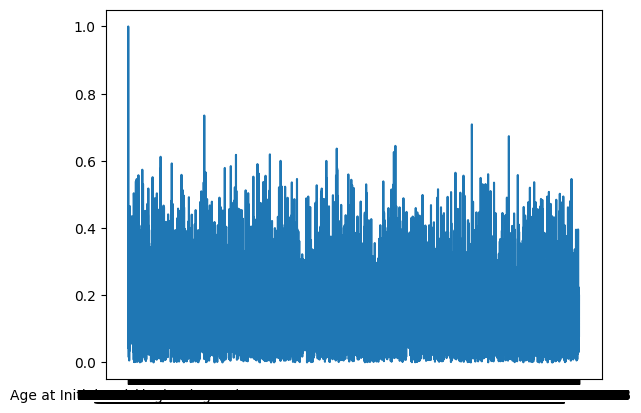

In [7]:
plt.plot(x)

In [134]:
len(x[x["PAM50 mRNA"]>0.2].index.tolist())

2781

In [135]:
final2 = final[x[x["PAM50 mRNA"]>0.2].index.tolist()] #keeping features above 0.4 corelation, 2781 proteins 

In [136]:
final2.shape

(77, 2781)

In [137]:
scaler = MinMaxScaler() #scaling
final2_scale = pd.DataFrame(scaler.fit_transform(final2.drop('PAM50 mRNA', axis=1)),columns=final2.columns.to_list()[1:])

In [138]:
X = final2_scale
y = final2['PAM50 mRNA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [139]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Precision:", precision_score(y_test, preds, average='micro'))
print("Recall:",recall_score(y_test, preds, average='micro'))
print("F1-Score:", f1_score(y_test, preds, average='micro'))
print(confusion_matrix(y_test, preds))

XGBoost's prediction accuracy is: 75.00
Precision: 0.75
Recall: 0.75
F1-Score: 0.75
[[5 0 0 0]
 [1 2 1 1]
 [0 0 6 0]
 [0 2 1 5]]


<BarContainer object of 50 artists>

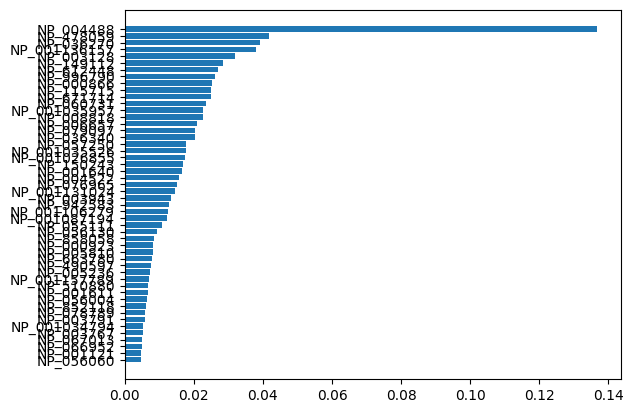

In [96]:
idx = xgb.feature_importances_.argsort()
plt.barh(X_train.columns[idx][2730:2780],xgb.feature_importances_[idx][2730:2780]) #top50

In [97]:
X_train.columns[idx][2730:2780] #top50 proteins in feature importance

Index(['NP_056060', 'NP_001121', 'NP_066952', 'NP_067013', 'NP_003767',
       'NP_001034794', 'NP_003791', 'NP_078789', 'NP_852118', 'NP_056004',
       'NP_001611', 'NP_510880', 'NP_001157789', 'NP_005236', 'NP_490597',
       'NP_663780', 'NP_005810', 'NP_000923', 'NP_858058', 'NP_056130',
       'NP_055111', 'NP_001087194', 'NP_001106279', 'NP_942583', 'NP_003943',
       'NP_001131024', 'NP_076965', 'NP_004522', 'NP_001640', 'NP_150243',
       'NP_001026855', 'NP_001035526', 'NP_057250', 'NP_036340', 'NP_079097',
       'NP_006657', 'NP_008818', 'NP_001035957', 'NP_060731', 'NP_671714',
       'NP_115715', 'NP_000866', 'NP_996790', 'NP_612448', 'NP_149112',
       'NP_003128', 'NP_001136157', 'NP_036270', 'NP_478059', 'NP_004488'],
      dtype='object')

NP_004488:FOXA3 is reported to be cancer hallmark for invasion and metastasis, resisting cell death and tumor proliferative inflammation which also is the most important feature for the model performance

In [119]:
pca = PCA(n_components=50,random_state=42)
r = pca.fit_transform(X = X_train.values)

In [120]:
component_weights = pca.components_
ex_var = pca.explained_variance_
ex_ratio = pca.explained_variance_ratio_

Text(0.5, 1.0, 'Variance ratio captured by PCs')

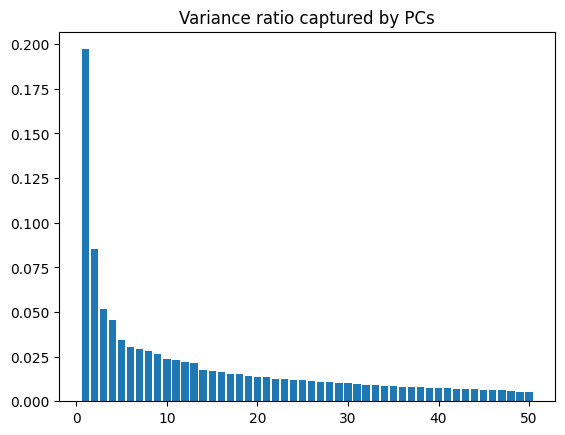

In [121]:
plt.bar(list(range(1,51)),ex_ratio)
plt.title("Variance ratio captured by PCs")

TODO: plot the variance caPTURED IN THE PCs and plot PC1 vs PC2

In [272]:
final = pd.read_csv("final_data.csv")

In [273]:
final[["Tumor","PAM50 mRNA"]].corr()

,Tumor,PAM50 mRNA
Tumor,1.000000,0.181535
PAM50 mRNA,0.181535,1.000000


Prediction of Tumor stage 

In [220]:
final.drop(['RefSeq_accession_number','Metastasis-Coded','PAM50 mRNA','AJCC Stage',"ER Status","PR Status","HER2 Final Status"],axis=True,inplace=True) #removing other targets and sample id

In [222]:
#corelation with the target "PAM50 mRNA"
x = pd.DataFrame(abs(final.corr()["Tumor"]))

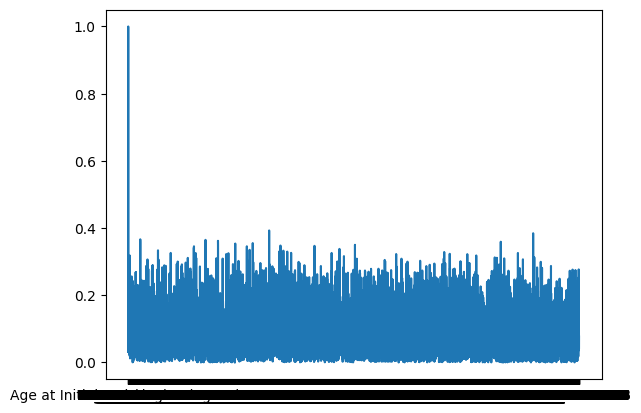

In [226]:
plt.plot(x)

In [229]:
len(x[x["Tumor"]>0.3].index.tolist())

71

In [231]:
final2 = final[x[x["Tumor"]>0.3].index.tolist()] #keeping features above 0.2 corelation, 444 proteins 

In [232]:
scaler = MinMaxScaler() #scaling
final2_scale = pd.DataFrame(scaler.fit_transform(final2.drop('Tumor', axis=1)),columns=final2.columns.to_list()[1:])

In [ ]:
plt.plot(final2_scale.var())

In [254]:
X = final2_scale
y = final2['Tumor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [255]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Precision:", precision_score(y_test, preds, average='micro'))
print("Recall:",recall_score(y_test, preds, average='micro'))
print("F1-Score:", f1_score(y_test, preds, average='micro'))
print(confusion_matrix(y_test, preds))

XGBoost's prediction accuracy is: 75.00
Precision: 0.75
Recall: 0.75
F1-Score: 0.75
[[ 0  2  0  0]
 [ 0 17  0  0]
 [ 0  3  0  0]
 [ 0  1  0  1]]


In [256]:
final2['Tumor'].value_counts()

1    51
2    11
0    10
3     5
Name: Tumor, dtype: int64

In [271]:
pca = PCA(n_components=5,random_state=42)
r = pca.fit_transform(X = X_train.values)
X_train_pca = pd.DataFrame(pca.transform(X_train.values))
print(X_train.shape, X_train_pca.shape)

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

preds = xgb.predict(X_test_pca)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Precision:", precision_score(y_test, preds, average='micro'))
print("Recall:",recall_score(y_test, preds, average='micro'))
print("F1-Score:", f1_score(y_test, preds, average='micro'))
print(confusion_matrix(y_test, preds))

(53, 70) (53, 5)
XGBoost's prediction accuracy is: 66.67
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-Score: 0.6666666666666666
[[ 0  2  0  0]
 [ 0 15  0  2]
 [ 0  3  0  0]
 [ 0  1  0  1]]


C:\Users\shasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
